# Week 36
## Deriving and Implementing Ridge Regression
### Kjersti Stangeland, Fall 2025

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

**b)** Why is it bad for a model to have too many degrees of freedom?

**c)** Why is it bad for a model to have too few degrees of freedom?

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

**e)** Why might we want to use Ridge regression instead of OLS?

**f)** Why migth we want to use OLS instead of Ridge regression?

__Answer a:__
An OLS model fit 4 degrees of freedom to the features $x, x^2, x^3$ and the intercept. 

__Answer b:__
If a model have too many degrees of freedom it can be difficult to find the best fit for complex datasets. The model might have too many features to please, which could make it slow and perform worse. 

__Answer c:__
If a model have too few degrees of freedom it might not be able to capture the nature of the data. As we saw in an earlier exercise, trying to fit a 4th order polynomial only using 2 degrees of freedom (or something similar) will only take the model that far. 

__Answer d:__
The expression for the effective degrees of freedom of the ridge regression fit is equation (3.50) in Hastie et al. (2017), 
$$
df(\lambda) = tr[\boldsymbol{X}(\boldsymbol{X^T X} + \lambda \boldsymbol{I})^{-1}\boldsymbol{X}^T]
$$

$$
= tr(\boldsymbol{H}_{\lambda})
$$

$$
= \sum_{j=1}^{p} \frac{d_j^2}{d_j^2 + \lambda}
$$

It is called effective degrees of freedom because if $\lambda = 0$ we would have the OLS regression scheme, and the sum would be equal to $p$. So effective in the sense that the degrees of freedom an penalized/reduced due to the hyperparameter. 

The expression above is found by taking the singular value decomposition of the ridge model, $\boldsymbol{\tilde y} = \boldsymbol{X} \boldsymbol{\hat{\theta}}_{Ridge} = \boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}$

__Answer e:__ Ridge can be preferred over OLS in the case of complex data sets where the features are correlated. It is also preferred when there are more features than data points, as Ridge reduces the impacts of the features whereas OLS would overfit. 

__Answer f:__ OLS is preferred over Ridge when there are many data points and few features. Because OLS does not penalizes its features as Ridge, it can be prone to overfitting. However, in the case of many data points and few features this is overcome.

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

__Answer 2a:__
From OLS we have $\boldsymbol{\hat \theta}_{OLS} = (\boldsymbol{X^TX})^{-1}\boldsymbol{X^T y}$, in Ridge regression we add a constant to the diagonal of the matrix we want to invert: 
$\boldsymbol{\hat \theta}_{Ridge} = (\boldsymbol{X^TX} + \lambda \boldsymbol{I})^{-1}\boldsymbol{X^T y}$. 

To show this we can start with the cost function of the Ridge regression:

$$
\min\limits_{\theta \in \mathbb{R}^p} \frac{1}{n} \| \boldsymbol{y - X \theta} \| _2^2 + \lambda\| \boldsymbol{\theta} \|_2^2
$$

$$
C(\boldsymbol{\theta}) = \frac{1}{n} [(\boldsymbol{y - X\theta})^T (\boldsymbol{y - X\theta}) + \lambda\boldsymbol{\theta ^T \theta}]
$$

We want to minimize the cost function with respect to $\boldsymbol{\theta}$:

$$
\frac{\partial C}{\partial \boldsymbol{\theta}} = \frac{\partial}{\partial \boldsymbol{\theta}} (\frac{1}{n} [(\boldsymbol{y - X\theta})^T (\boldsymbol{y - X\theta}) + \lambda\boldsymbol{\theta ^T \theta}]) = 0
$$

Writing it out:

$$
\frac{\partial}{\partial \boldsymbol{\theta}} (\frac{1}{n} [\bold y^T \bold y - \bold y^T \boldsymbol{X\theta} - \boldsymbol{\theta^TX^T} \bold y +\boldsymbol{\theta^TX^T}\boldsymbol{X\theta} + \lambda\boldsymbol{\theta ^T \theta}]) = 0
$$

Since $\bold y^T \boldsymbol{X\theta}$ is a scalar it is equal to its transposed. That is: $\bold y^T \boldsymbol{X\theta} = (\bold y^T \boldsymbol{X\theta})^T = \bold{\theta^T} \bold X^T \bold y$. This leaves us 
with 

$$
\frac{\partial}{\partial \boldsymbol{\theta}} (\frac{1}{n} [\bold y^T \bold y - 2\boldsymbol{\theta^TX^T} \bold y +\boldsymbol{\theta^TX^T}\boldsymbol{X\theta} + \lambda\boldsymbol{\theta ^T \theta}]) = 0
$$

Now we can derivate each term with respect to $\bold \theta$. The first term drops out as it is independent of $\bold \theta$.

$$
\frac{1}{n}(-2\frac{\partial}{\partial \boldsymbol{\theta}} (\boldsymbol{\theta^TX^T} \bold y) + \frac{\partial}{\partial \boldsymbol{\theta}} (\boldsymbol{\theta^TX^T}\boldsymbol{X\theta}) + \frac{\partial}{\partial \boldsymbol{\theta}} (\lambda\boldsymbol{\theta ^T \theta}))=0
$$

$$
\frac{1}{n}(-2(\boldsymbol{X^T} \bold y) + 2\bold X^T \bold X \boldsymbol{\theta}+ 2\lambda \boldsymbol{\theta})

=0
$$

$$
-\boldsymbol{X^T} \bold y + \bold X^T \bold X \boldsymbol{\theta} + \lambda \boldsymbol{\theta} = 0
$$

$$
-\boldsymbol{X^T} \bold y + (\bold X^T \bold X + \lambda \boldsymbol{I})\boldsymbol{\theta}= 0
$$

$$
(\bold X^T \bold X + \lambda \boldsymbol{I})\boldsymbol{\theta}= \boldsymbol{X^T} \bold y 
$$

$$
\boldsymbol{\theta}= (\bold X^T \bold X + \lambda \boldsymbol{I})^{-1}\boldsymbol{X^T} \bold y 
$$

## Exercise 3 - Scaling data

In [321]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [322]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [323]:
def polynomial_features(x, p, intercept=False):
    n = len(x)

    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        for i in range(1, p + 1):
            X[:, i] = x ** i
    else:
        X = np.zeros((n, p))
        for i in range(p):
            X[:, i] = x ** (i + 1)

    return X

**b)** Split your data into training and test data(80/20 split)

In [324]:
X = polynomial_features(x, 3)

In [325]:
np.shape(X)

(100, 3)

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [327]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [335]:
def Ridge_parameters(X, y, lamb=0.01):
    # Assumes X is scaled and has no intercept column

    I = np.eye(np.shape(X.T @ X)[0])
    
    return np.linalg.inv(X.T @ X + lamb*I) @ X.T @ y

In [336]:
beta = Ridge_parameters(X_train_s, y_train, lamb=0.001)
beta

array([ 0.7573924 , -0.13934517, -0.36642607])

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

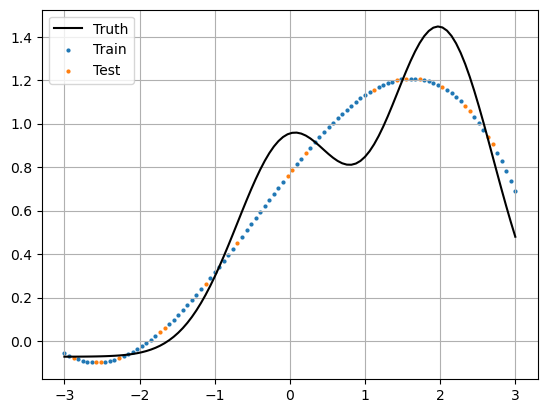

In [330]:
plt.plot(x, y, color='black', label='Truth')
plt.scatter(x_train, X_train_s @ beta + y_offset, s=4, label='Train')
plt.scatter(x_test, X_test_s @ beta + y_offset, s=4, label='Test')
plt.legend()
plt.grid()

## Exercise 5 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

In [332]:
def MSE(y_data, y_pred):
    return np.mean((y_data - y_pred)**2)

Text(0.5, 1.0, 'Ridge Regression MSE vs Polynomial Degree (lambda=0.01)')

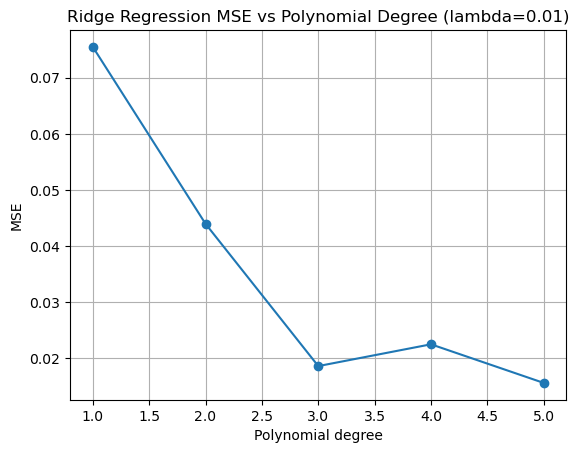

In [360]:
# a)
degrees = [1, 2, 3, 4, 5]

mse_list = []

for d in degrees:
    X = polynomial_features(x, d)       
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    
    beta = Ridge_parameters(X_train_s, y_train, lamb=0.01)
    y_pred = X_test_s @ beta + y_offset
    mse_list.append(MSE(y_test, y_pred))

plt.plot(degrees, mse_list, marker='o')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.grid()
plt.title('Ridge Regression MSE vs Polynomial Degree (lambda=0.01)')

From the figure above, MSE seems to be reduced with increasing polynomial degree.

Text(0.5, 1.0, 'Ridge Regression MSE vs Polynomial Degree (lambda=0.01)')

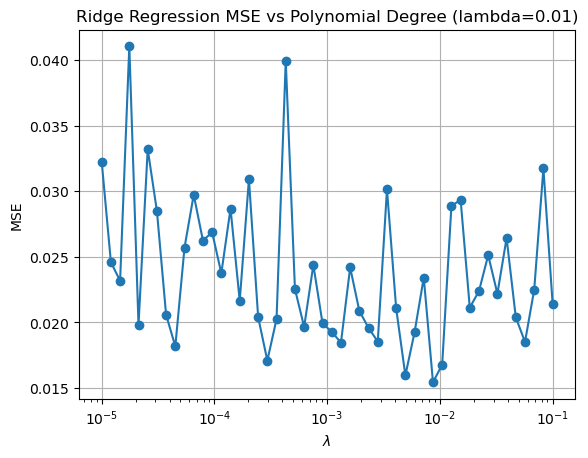

In [367]:
# b)

lambdas = np.logspace(-5, -1)

mse_list = []

for l in lambdas:
    X = polynomial_features(x, 3)       
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    
    beta = Ridge_parameters(X_train_s, y_train, lamb=l)
    y_pred = X_test_s @ beta + y_offset
    mse_list.append(MSE(y_test, y_pred))

plt.semilogx(lambdas, mse_list, marker='o')
plt.xlabel(r'$\lambda$')
plt.ylabel('MSE')
plt.grid()
plt.title('Ridge Regression MSE vs Polynomial Degree (lambda=0.01)')

From the figure above, it is hard to tell a definite trend in MSE as a function of hyperparameter. It has a seemingly random nature, but if we 'let the good will to' perhaps a decrease in MSE with larger lambda. Put more correctly, a slight tendency to have better performance with higher penalty (???).

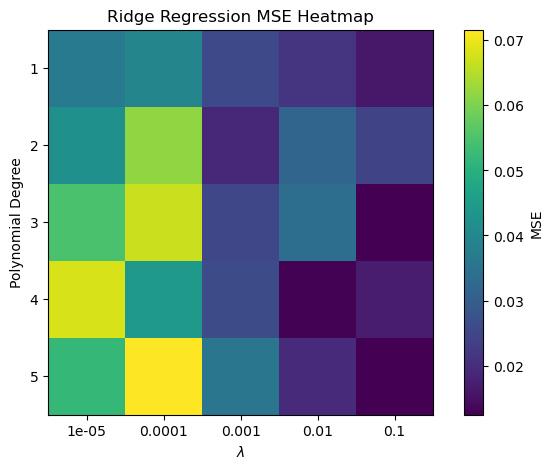

In [373]:
# c)
degrees = [1, 2, 3, 4, 5]
lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

mse_heatmap = np.zeros((len(degrees), len(lambdas)))

for i, l in enumerate(lambdas):
    for j, d in enumerate(degrees):
        X = polynomial_features(x, d)       
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train)
        X_test_s = scaler.transform(X_test)
    
        beta = Ridge_parameters(X_train_s, y_train, lamb=l)
        y_pred = X_test_s @ beta + y_offset

        mse_heatmap[i, j] = MSE(y_test, y_pred)

plt.figure(figsize=(8,5))
im = plt.imshow(mse_heatmap)
plt.colorbar(im, label='MSE')
plt.xticks(np.arange(len(lambdas)), lambdas)
plt.yticks(np.arange(len(degrees)), degrees)
plt.xlabel(r'$\lambda$')
plt.ylabel('Polynomial Degree')
plt.title('Ridge Regression MSE Heatmap')
plt.show()

The heat map above show the MSE as function of both polynomial degree and hyperparameter. The lowest MSE is seen with larger hyperparameters and high polynomial degree. 